## Final Project
- John Serino   
- Math 219
- 22 May 2023


In [1]:
#importing our most commonly used modules
import numpy as np
import pandas as pd
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from numpy.random import default_rng
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.model_selection import GridSearchCV

# Preface and Dataset Manipulation
For this assignment I will be using a dataset created by user "TALBOTT" through Kraggle's database.

This is the same dataset that I used in the previous Project.

The set can be found using this link: https://www.kaggle.com/datasets/ttalbitt/american-football-team-stats-1998-2019?select=AmericanFootball98.csv

"TALBOTT"'s dataset looks at the statistics of NFL football teams over the 21 year range of 1999-2019.
In particular I will be looking to see which statistics can be used to best predict which team will win the Superbowl in any given year.

In [2]:
# importing "Talbott's" dataset
football = pd.read_csv("AmericanFootball98.csv",index_col=0)

As was stated in the previous projects, the original dataset does not have a built in target classification, so instead I am appending a new column to the end of the dataset named `Superbowl`.

The new column will assign `0` to teams that did not win the Superbowl, and `1` if the team did win the Superbowl.


In [3]:
# adding an empty column to the csv file
football = football.assign(Superbowl = 0)
# a quick look at the dataset for readers.
football.head(3)

,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg start,opp avg time per drive,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,Superbowl
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,39,191,19.4,17.3,Own 24.8,2:20,5.0,22.8,1.00,0
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,33,178,23.6,12.4,Own 27.7,2:39,5.6,26.2,1.29,0
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,40,189,34.4,10.1,Own 31.4,2:35,5.6,26.7,1.81,0


We will now have fill in the Superbowl column with a `1` to represent each team that one the superbowl, this can be done manually by using the `.at[]` method.

In [4]:
football.at['kan2019','Superbowl'] = 1
football.at['nwe2018','Superbowl'] = 1
football.at['phi2017','Superbowl'] = 1
football.at['nwe2016','Superbowl'] = 1
football.at['den2015','Superbowl'] = 1
football.at['nwe2014','Superbowl'] = 1
football.at['sea2013','Superbowl'] = 1
football.at['rav2012','Superbowl'] = 1
football.at['nyg2011','Superbowl'] = 1
football.at['gnb2010','Superbowl'] = 1
football.at['nor2009','Superbowl'] = 1
football.at['pit2008','Superbowl'] = 1
football.at['nyg2007','Superbowl'] = 1
football.at['clt2006','Superbowl'] = 1
football.at['pit2005','Superbowl'] = 1
football.at['nwe2004','Superbowl'] = 1
football.at['nwe2003','Superbowl'] = 1
football.at['tam2002','Superbowl'] = 1
football.at['nwe2001','Superbowl'] = 1
football.at['rav2000','Superbowl'] = 1
football.at['ram1999','Superbowl'] = 1

# Opening
In this report, the final one of the semester, our goal is to use either clustering of quantitative data or network analysis on a dataset of our choice.
For this report, I will be using clustering of quantiative data for unsupervised learning.
I will be using the `AmericanFootball98` dataset created by "Talbott" to practice unsupervised learning of data.

# Standardized Columns, and their usage in this dataset

When determining whether or not to use stardized columns, or z-scores for clustering we can see that in our case z-score normalization is necessary because it allow for each of our features to contribute equally to clustering.
We will begin by dropping non-quantitative features, and our classification.

In [5]:

# Creating feature frame out of all quantitative values, and dropping 'Superbowl' column
X = football.drop(['Superbowl','avg start','avg time per drive',
                   'opp avg start','opp avg time per drive'],axis = 1)
# Creating target for unsupervised learning
y = football['Superbowl']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

Now that we have completed our standardization, we can continue on in our clustering

# KMeans and Agglomerative Clustering

We can use K-Means and Agglomerative Clustering 

In [6]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=668, n_init=3, verbose=1, random_state=302)
km2.fit(X)

print(f"final inertia: {km2.inertia_:.5g}")
print("cluster centroids:")
print(km2.cluster_centers_)

Initialization complete
Iteration 0, inertia 33043.8806
Iteration 1, inertia 16521.9403
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 33043.8806
Iteration 1, inertia 16521.9403
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 33043.8806
Iteration 1, inertia 16521.9403
Converged at iteration 1: strict convergence.
final inertia: 16522
cluster centroids:
[[ 10.     6.   393.   ...   5.5   24.2    1.43]
 [ 13.     3.   376.   ...   5.8   31.8    1.8 ]
 [  4.    12.   213.   ...   5.2   24.7    1.58]
 ...
 [  5.    11.   289.   ...   5.6   29.2    2.  ]
 [  8.     8.   270.   ...   5.2   24.3    1.52]
 [  8.     8.   306.   ...   5.8   29.3    1.78]]


The clustestering on our dataset `X` shows us that it takes 669 clusters to reach an inertia of 0, and 668 clusters to reach the lowest non-zero inertia's of our data. There are 669 total clusters so when seeing that there are 668 clusters when inertia is its lowest tells us that clustering is very poor with this dataset when using the `KMeans` clustering method 
Since no reference cluster is available, we will be looking at the silhouttes scores for our dataset.

We now define a function that will allow us to take silhoutte scores in the instance that we are unable to use ARI because of reference clustering issues.

In [45]:
def report(clustering):
    result = X.copy()
    y_hat = clustering.labels_    # cluster assignments
    result["cluster"] = y_hat
    result["sil"] = silhouette_samples(X, y_hat)
    print("silhouette medians by cluster:")
    print( result.groupby("cluster")["sil"].median() )
    
    sns.catplot(data=result,
        x="cluster", y="sil",
        kind="violin", height=3
        );
    return result

We will run this function on our best k means value which was: 668 clusters

silhouette medians by cluster:
cluster
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
663    0.0
664    0.0
665    0.0
666    0.0
667    0.0
Name: sil, Length: 668, dtype: float64


,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen yards,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,sil,cluster
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,920,39,191,19.4,17.3,5.0,22.8,1.00,0.0,441
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,815,33,178,23.6,12.4,5.6,26.2,1.29,0.0,187
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,902,40,189,34.4,10.1,5.6,26.7,1.81,0.0,385
mia2019,5,11,306,4960,1022,4.9,26,8,315,371,...,1084,34,182,45.6,8.8,5.9,34.3,2.53,0.0,174
rav2019,14,2,531,6521,1064,6.1,15,7,386,289,...,795,39,164,32.9,14.6,5.7,28.8,1.65,0.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ram1999,13,3,526,6412,994,6.5,31,16,335,343,...,1007,21,198,21.7,17.2,5.1,23.7,1.12,0.0,200
car1999,8,8,421,5686,982,5.8,34,19,307,345,...,877,27,184,31.5,12.5,5.8,29.8,1.79,0.0,459
atl1999,5,11,285,4542,931,4.9,35,16,273,278,...,980,33,185,34.6,9.7,5.6,28.1,1.86,0.0,319


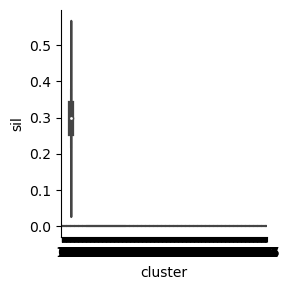

In [46]:
km668 = KMeans(n_clusters = 668,n_init = 1, random_state =302)
km668.fit(X)
report(km668)

As we can see, judging based off of the violin plot, we can see that there is clearly an issue with our silhoutte scoring, there is only one violin plot above the silhoutte value 0, suggesting that our silhoutte scores very were very poor, and hence KMeans clustering is very poor for this dataset when looking at both the ARI and sihoutte scores.

# Agglomerative Clustering
After receiving a poor result for KMeans with our optimal clustering number, we will switch to agglomerative clustering and see if this produces better results.

We will use three different types of agglomerative clustering and compute there ARI scores as well as there silhouette scores if it is necessary. 

The types of clustering that we will be using are `single`, `ward`, and `complete`.

We will begin with `single` clustering.

In [42]:
from sklearn.cluster import AgglomerativeClustering

single = AgglomerativeClustering(n_clusters=668, linkage="single")
pipe = make_pipeline(StandardScaler(), single)
pipe.fit(X)
y_hat = single.labels_        # cluster assignments
football["single"] = y_hat

from sklearn.metrics import adjusted_rand_score
ARI = adjusted_rand_score(y, y_hat)
print(f"single linkage ARI: {ARI:.4f}")
football["single"].value_counts()

single linkage ARI: 0.0000


0      2
341    1
203    1
330    1
528    1
      ..
252    1
363    1
518    1
421    1
2      1
Name: single, Length: 668, dtype: int64

We can look at the ARI score, and the result of running the `.value_counts()` function on our set to see that we should take a look at the silhouette scores. We can tell this because the single linkage ARI is '0.0000' and by using the `value_counts()` function we can see that each value is repeated only once, with the exception of the value `0`.

We will now conduct the process of computing silhouette scores.

silhouette medians by cluster:
cluster
0      0.297792
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
663    0.000000
664    0.000000
665    0.000000
666    0.000000
667    0.000000
Name: sil, Length: 668, dtype: float64


,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen yards,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,sil,cluster
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,920,39,191,19.4,17.3,5.0,22.8,1.00,0.0,463
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,815,33,178,23.6,12.4,5.6,26.2,1.29,0.0,433
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,902,40,189,34.4,10.1,5.6,26.7,1.81,0.0,459
mia2019,5,11,306,4960,1022,4.9,26,8,315,371,...,1084,34,182,45.6,8.8,5.9,34.3,2.53,0.0,431
rav2019,14,2,531,6521,1064,6.1,15,7,386,289,...,795,39,164,32.9,14.6,5.7,28.8,1.65,0.0,383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ram1999,13,3,526,6412,994,6.5,31,16,335,343,...,1007,21,198,21.7,17.2,5.1,23.7,1.12,0.0,4
car1999,8,8,421,5686,982,5.8,34,19,307,345,...,877,27,184,31.5,12.5,5.8,29.8,1.79,0.0,3
atl1999,5,11,285,4542,931,4.9,35,16,273,278,...,980,33,185,34.6,9.7,5.6,28.1,1.86,0.0,6


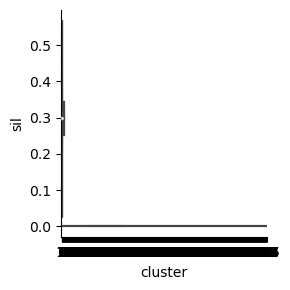

In [49]:
agg = AgglomerativeClustering(n_clusters = 668, linkage = 'single')
agg.fit(X)
report(agg)

Once more, the violin plot is very poor, there is only 1 non-zero silhoutte value for a cluster showing that using `single` agglomerative clustering does not work well on this dataset.

We will continue to use the `ward` clustering method.
Judging by the violin plot of the silhouette scores here, and the 

In [16]:
ward = AgglomerativeClustering(n_clusters=668, linkage="ward")
pipe = make_pipeline(StandardScaler(), ward)
pipe.fit(X)
y_hat = ward.labels_
football["ward"] = y_hat

print("Ward linkage results:")
print(football["ward"].value_counts())
ARI = adjusted_rand_score(y, football["ward"])
print(f"Ward linkage ARI: {ARI:.4f}")

Ward linkage results:
0      2
366    1
485    1
329    1
188    1
      ..
176    1
491    1
631    1
569    1
1      1
Name: ward, Length: 668, dtype: int64
Ward linkage ARI: 0.0000


Once more our ARI score is very poor, and the only ward clustering value with more than one value is `0` with 2 linkage results, once again very poor.

We will continue on and compute the silhoutte scores using `ward` clustering.

silhouette medians by cluster:
cluster
0      0.297792
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
663    0.000000
664    0.000000
665    0.000000
666    0.000000
667    0.000000
Name: sil, Length: 668, dtype: float64


,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen yards,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,sil,cluster
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,920,39,191,19.4,17.3,5.0,22.8,1.00,0.0,383
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,815,33,178,23.6,12.4,5.6,26.2,1.29,0.0,651
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,902,40,189,34.4,10.1,5.6,26.7,1.81,0.0,403
mia2019,5,11,306,4960,1022,4.9,26,8,315,371,...,1084,34,182,45.6,8.8,5.9,34.3,2.53,0.0,465
rav2019,14,2,531,6521,1064,6.1,15,7,386,289,...,795,39,164,32.9,14.6,5.7,28.8,1.65,0.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ram1999,13,3,526,6412,994,6.5,31,16,335,343,...,1007,21,198,21.7,17.2,5.1,23.7,1.12,0.0,4
car1999,8,8,421,5686,982,5.8,34,19,307,345,...,877,27,184,31.5,12.5,5.8,29.8,1.79,0.0,8
atl1999,5,11,285,4542,931,4.9,35,16,273,278,...,980,33,185,34.6,9.7,5.6,28.1,1.86,0.0,3


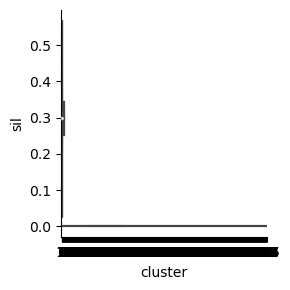

In [50]:
agg = AgglomerativeClustering(n_clusters = 668, linkage = 'ward')
agg.fit(X)
report(agg)

Once more, similarly to the `singular` clustering algorithm, we can see that this violin plot is very poor. There is only 1 viewable cluster with a silhoutte score greater than 0, while there are hundreds with a silhoutte_score of 0.

We will now take a look at our last hope and final clustering method, `complete` clustering.

In [52]:
complete = AgglomerativeClustering(n_clusters=668, linkage="complete")
pipe = make_pipeline(StandardScaler(), complete)
pipe.fit(X)
y_hat = single.labels_        # cluster assignments
football["complete"] = y_hat
football.head()

print("Complete linkage results:")
print(football["complete"].value_counts())
ARI = adjusted_rand_score(y, football["complete"])
print(f"Complete linkage ARI: {ARI:.4f}")

Complete linkage results:
0      2
341    1
203    1
330    1
528    1
      ..
252    1
363    1
518    1
421    1
2      1
Name: complete, Length: 668, dtype: int64
Complete linkage ARI: 0.0000


Once more we see an ARI score equivalent to 0, and that the only clustering value that occurs more than once is the value `0` showing poor clustering.

We will now take a look at the silhoutte score of this linkage type in agglomerative clustering.

silhouette medians by cluster:
cluster
0      0.297792
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
663    0.000000
664    0.000000
665    0.000000
666    0.000000
667    0.000000
Name: sil, Length: 668, dtype: float64


,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,1st downs,completions,...,opp pen yards,opp pen 1st downs,opp number drives,opp score percentage,opp turnover percentage,opp avg plays per drive,opp avg yards per drive,opp avg points per drive,sil,cluster
team_code,,,,,,,,,,,,,,,,,,,,,
nwe2019,12,4,420,5664,1095,5.2,15,6,338,378,...,920,39,191,19.4,17.3,5.0,22.8,1.00,0.0,375
buf2019,10,6,314,5283,1018,5.2,19,7,314,299,...,815,33,178,23.6,12.4,5.6,26.2,1.29,0.0,651
nyj2019,7,9,276,4368,956,4.6,25,9,253,323,...,902,40,189,34.4,10.1,5.6,26.7,1.81,0.0,406
mia2019,5,11,306,4960,1022,4.9,26,8,315,371,...,1084,34,182,45.6,8.8,5.9,34.3,2.53,0.0,427
rav2019,14,2,531,6521,1064,6.1,15,7,386,289,...,795,39,164,32.9,14.6,5.7,28.8,1.65,0.0,351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ram1999,13,3,526,6412,994,6.5,31,16,335,343,...,1007,21,198,21.7,17.2,5.1,23.7,1.12,0.0,3
car1999,8,8,421,5686,982,5.8,34,19,307,345,...,877,27,184,31.5,12.5,5.8,29.8,1.79,0.0,4
atl1999,5,11,285,4542,931,4.9,35,16,273,278,...,980,33,185,34.6,9.7,5.6,28.1,1.86,0.0,5


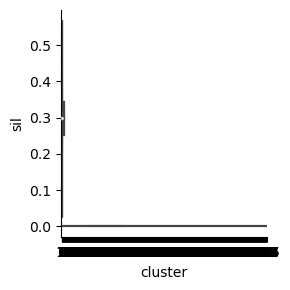

In [55]:
agg = AgglomerativeClustering(n_clusters = 668, linkage = 'complete')
agg.fit(X)
report(agg)

Once more we see that there is only one visible violin plot suggesting extremely poor clustering.

# Conclusion and Takeaways

Fortunately for this project we were successfully able to standardize the columns of our dataset as well as use k-means clustering and agglomerative clustering while also computing the ARI scoring and silhoutte scores of these types of clustering. 

Unfortunately, all of the numbers that we got back from our testing were very poor. 

Each type of clustering yielded very poor results and showed very poor clustering. 

This can likely be attributed to our best `k` value for clustering being `668`. This was likely the best K Means value because of the fact that this dataset is very poor for clustering in general. This is because of the poor target column `Superbowl` where very few of the teams have actual values in this column, and this has been an issue in each of the projects.

In order to get better data, the target `Superbowl` column would have to be significantly improved to provide better clustering adding values for reaching the Superbowl, reaching the playoffs, and more.

Although all of the clustering was very poor, it was very interesting to run through each of the clustering methods that were available to use, and I will definitely improve the `Superbowl` column in order to hopefully produce better clustering results.